# Table des matières

[Importation des données énergie](#import_data_energie) <br>
[Importation des données météo](#import_data_meteo) <br>
[Représentation des séries temporelles](#rep_serie_temp) <br>


[Mission 1](#mission1) <br>

[Mission 2](#mission2) <br>

[Mission 3](#mission3) <br>




In [1]:
library('gdata')
library('plyr')
library('tibble')
library('tidyr')
library('dplyr')
library('reshape')
library('forecast')
library('imputeTS')
library('caschrono')

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:gdata’:

    combine, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename

The following objects are masked from ‘package:tidyr’:

    expand, smiths

The following objects are masked from ‘package:

<a id='import_data_energie'></a>

# Importation données energie

In [2]:
df_energie <- as.data.frame(read.xls('../fichiers_csv/energie.xls'))
colnames(df_energie)
df_energie$Mois <- as.vector(df_energie$Mois)
df_energie$Qualite <- as.vector(df_energie$Qualite)
df_energie$Territoire <- as.vector(df_energie$Territoire)

str(df_energie)


[1] "Mois"                                    
 [2] "Qualite"                                 
 [3] "Territoire"                              
 [4] "Production.totale"                       
 [5] "Production.nucleaire"                    
 [6] "Production.thermique.totale"             
 [7] "Production.thermique.charbon"            
 [8] "Production.thermique.fioul"              
 [9] "Production.thermique.gaz"                
[10] "Production.hydraulique"                  
[11] "Production.eolien"                       
[12] "Production.solaire"                      
[13] "Production.bio.energies"                 
[14] "Consommation.totale"                     
[15] "Solde.exportateur"                       
[16] "Echanges.export"                         
[17] "Echanges.import"                         
[18] "Echanges.avec.le.Royaume.uni"            
[19] "Echanges.avec.l.Espagne"                 
[20] "Echanges.avec.l.Italie"                  
[21] "Echanges.aves.la.Suisse"                 
[22] "Echanges.avec.l.Allemagne.et.la.Belgique"

'data.frame':	855 obs. of  22 variables:
 $ Mois                                    : chr  "2010-01" "2010-02" "2010-03" "2010-04" ...
 $ Qualite                                 : chr  "Donnees consolidees" "Donnees consolidees" "Donnees consolidees" "Donnees consolidees" ...
 $ Territoire                              : chr  "France" "France" "France" "France" ...
 $ Production.totale                       : int  56542 50406 51071 41693 39847 40217 41064 39499 39218 42116 ...
 $ Production.nucleaire                    : int  40313 36316 35984 31294 29372 29575 31744 32391 31657 31885 ...
 $ Production.thermique.totale             : int  8801 6822 7250 3568 2843 2366 2953 1580 2965 4713 ...
 $ Production.thermique.charbon            : int  2928 1893 1994 1489 1097 681 1056 249 1226 1831 ...
 $ Production.thermique.fioul              : int  1690 1175 1275 612 504 463 511 424 502 896 ...
 $ Production.thermique.gaz                : int  4184 3754 3981 1467 1242 1223 1386 907 1236 1986 ...

In [3]:
df_energie <- df_energie %>% 
  select(Mois, Territoire, Consommation.totale) %>%
  filter(Territoire == "France")

In [4]:
mois = rep(c('JAN','FEV','MAR','AVR','MAI','JUIN','JUIL','AOUT','SEP','OCT','NOV','DEC'),8)
annee = c(rep('2010',12),rep('2011',12),rep('2012',12),rep('2013',12),rep('2014',12),rep('2015',12),rep('2016',12),rep('2017',12))

In [5]:
df_energie <- df_energie[1:96,]
df_energie <- cbind.data.frame(df_energie,mois,annee)
df_energie$mois <- as.vector(df_energie$mois)
df_energie$annee <- as.vector(df_energie$annee)


In [6]:
df_energie <- df_energie[,c("annee", "mois", "Consommation.totale", "Mois","Territoire")]

In [7]:
df_energie <- cast(df_energie,annee ~ mois,value='Consommation.totale',sum)
df_energie <- df_energie[,c("annee", 'JAN','FEV','MAR','AVR','MAI','JUIN','JUIL','AOUT','SEP','OCT','NOV','DEC')]

In [8]:
df_energie <- df_energie[1:7,]

In [9]:
df_energie

annee,JAN,FEV,MAR,AVR,MAI,JUIN,JUIL,AOUT,SEP,OCT,NOV,DEC
2010,56342,48698,48294,38637,37284,34567,36031,33069,35104,40918,46532,57600
2011,53873,45937,45543,35442,35107,33771,34204,32625,34230,37977,41837,48241
2012,51086,54476,43156,40176,35257,33219,34141,32247,33269,38628,44260,49602
2013,53619,49639,49480,40292,36821,32973,34751,31591,33195,37063,45310,50108
2014,49359,44580,43104,36331,34695,32608,33935,31004,33266,36301,40617,49350
2015,52536,48676,45739,36898,33927,33256,34912,31603,33521,39170,41085,44727
2016,50161,46440,47270,39102,34746,32852,33718,32132,33245,38590,44293,50670


<a id='import_data_meteo'></a>

# Importation données météo

Le Degré Jour Unifié est une valeur représentative de l’écart entre la température moyenne d’une journée et un seuil de température. Ce seuil est généralement fixé à 18°C. On parle alors de DJU base 18. Ainsi, pour une exploitation de chauffage, on s’intéressera aux DJU déficitaires, calculés à partir de températures inférieures à la base fixée.

Plus le nombre de DJU est élevé, plus le climat a été froid sur la période considérée.
On observe sur le graphique en haut que l’hiver 2013/2014 a été l’hiver le plus doux depuis 2007. Inversement, l’hiver 2012/2013 a été le plus rigoureux.

http://www.gpso-energie.fr/conseils/analyser-ses-consommations-dju

In [10]:
files_to_read <- list.files(path = '../fichiers_csv/meteo_data',full.names = TRUE)


In [11]:

liste_meteo <- lapply(files_to_read,function(i){
    list_csv <- read.xls(i)

    
})

In [12]:
df_meteo <- lapply(liste_meteo,function(i){
    a <- data.frame(i,stringsAsFactors = FALSE)

station <- as.vector(a[1,'X.1'])

mat <- as.matrix(a)
mat <- mat[-c(1,2,3,4,5,6,7),]
colnames(mat) <- mat[1,]
mat <- mat[-1,]
colnames(mat)[1] <- 'Annee'
nb_row <- length(mat[,'Annee'])
mat<- cbind(rep(station,nb_row),mat)
colnames(mat)[1] <- 'Station'
as.data.frame(mat,stringsAsFactors = FALSE)
mat[1:7,] #Valeur manquantes en 2017
})

In [13]:
df_base_meteo <- ldply(df_meteo, rbind)
df_base_meteo <- rename(df_base_meteo,c('Station' = 'station','Annee'='annee','JAN'='JAN','F\xc9V'='FEV','MAR'='MAR','AVR'='AVR','MAI'='MAI','JUN'='JUN','JUI'='JUI','AO\xdb'='AOU','SEP'='SEP','OCT'='OCT','NOV'='NOV','D\xc9C'='DEC','Total'='total'))


In [14]:
df_base_meteo[] <- as.vector(unlist(df_base_meteo, use.names = FALSE))
df_base_meteo[-2] <- as.numeric(unlist(df_base_meteo[-2], use.names = FALSE))

Warning message in eval(expr, envir, enclos):
“NAs introduits lors de la conversion automatique”

In [15]:
df_base_meteo <- ddply(df_base_meteo,~annee,summarise, JAN = mean(JAN),
      FEV = mean(FEV),
      MAR = mean(MAR),
      AVR = mean(AVR),
MAI = mean(MAI),
JUN = mean(JUN),
JUI = mean(JUI),
AOU = mean(AOU),
SEP = mean(SEP),
OCT = mean(OCT),
NOV = mean(NOV),
DEC = mean(DEC))


In [16]:
df_base_meteo

annee,JAN,FEV,MAR,AVR,MAI,JUN,JUI,AOU,SEP,OCT,NOV,DEC
2010,484.9267,369.9756,317.2278,189.6422,154.08889,40.69889,5.656667,22.85444,75.07222,184.95667,303.3189,478.8556
2011,406.2789,313.8867,273.3411,121.5056,70.45333,46.10111,32.323333,19.43889,32.31667,136.76111,220.3189,326.8511
2012,373.1278,478.2522,245.1367,237.8778,103.84111,41.35444,24.552222,8.21000,67.81889,152.04111,282.9667,363.1200
2013,429.6233,413.0800,353.4844,231.2144,186.51889,61.25778,5.921111,13.47556,53.80667,112.49667,321.7444,379.1200
2014,341.1244,302.5311,274.3767,171.0933,130.10000,30.49000,15.743333,32.52667,35.64222,96.57444,221.9400,384.3467
2015,406.9656,387.6867,296.7800,180.4811,107.18111,27.36556,11.420000,13.06667,85.59333,189.47000,223.8689,279.3678
2016,361.8989,329.3178,334.9833,229.5767,121.88111,39.40111,14.776667,11.26111,28.29556,190.01556,292.3822,401.0267


<a id='rep_serie_temp'></a>

# Série temporelles

## Conso d'energie

In [17]:
df_energie_ts <- ts(as.vector(as.matrix(df_energie[-1])),start=c(2010,1),frequency = 12)
log_df_energie_ts = log(df_energie_ts)

In [18]:
#dev.copy(png,'../presentation/images/ts_energie.png')
png(filename='../presentation/images/ts_energie.png')
plot(df_energie_ts,ylab='Conso mensuelle',main="Série temporelle de la consommation d'électricité")
dev.off()

png 
  2

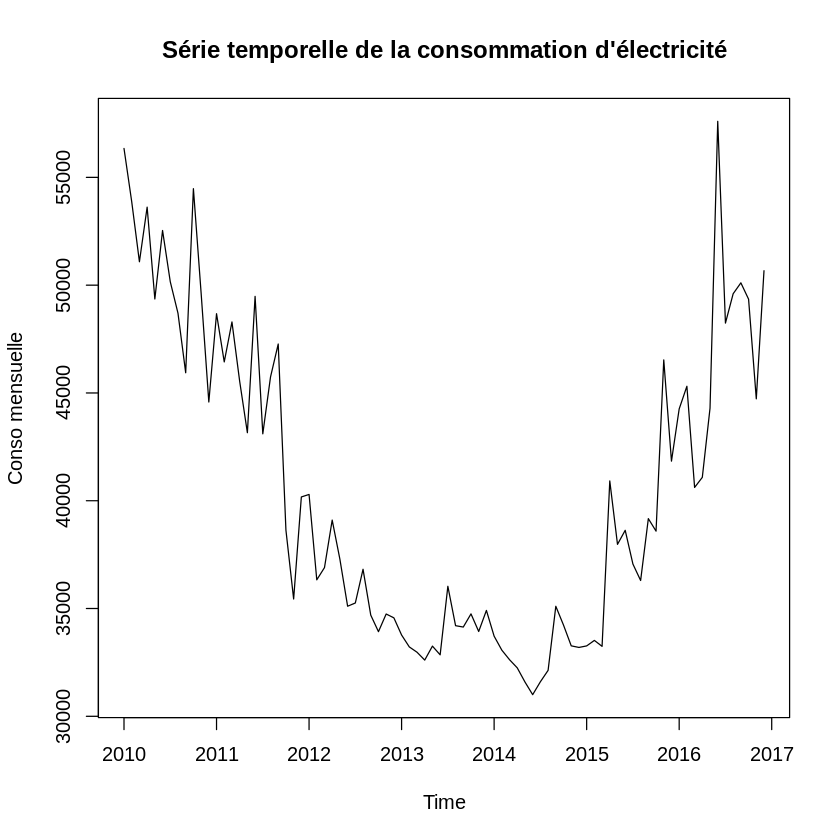

In [19]:
plot(df_energie_ts,ylab='Conso mensuelle',main="Série temporelle de la consommation d'électricité")

# Effet meteo dju

In [20]:
df_base_meteo_ts <- ts(as.vector(as.matrix(df_base_meteo[-1])),start=c(2010,1),frequency = 12)
log_df_base_meteo_ts = log(df_base_meteo_ts)

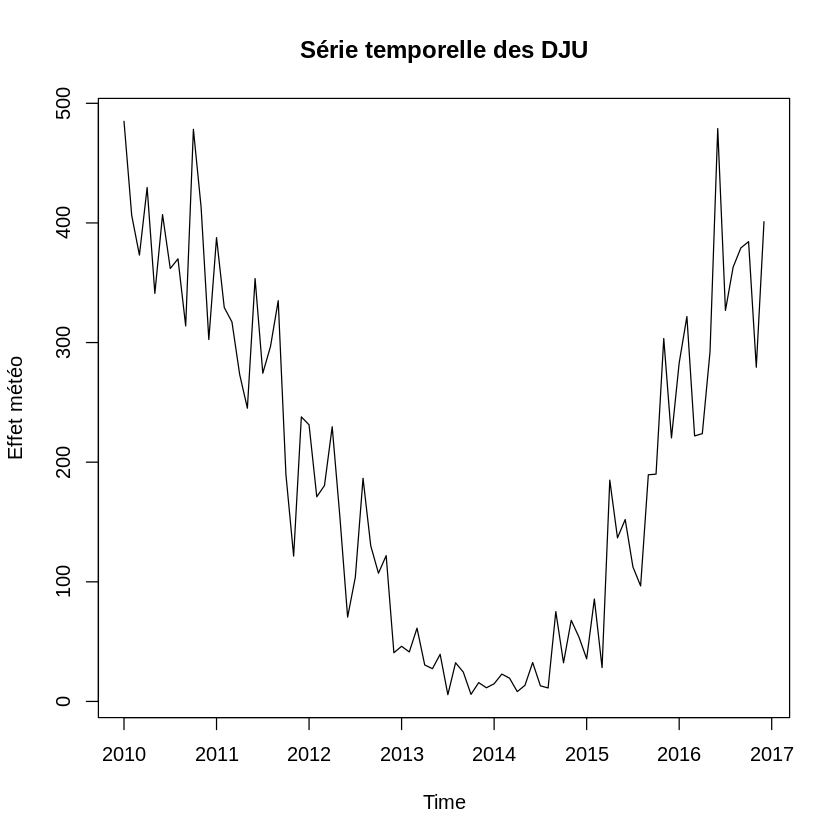

In [21]:
plot(df_base_meteo_ts,ylab='Effet météo',main='Série temporelle des DJU')

In [22]:
png(filename='../presentation/images/ts_meteo.png')
plot(df_base_meteo_ts,ylab='Effet météo',main='Série temporelle des DJU')
dev.off()

png 
  2

<a id='mission1'></a>

# Mission 1 : Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

Comment pondérer les consommations en fonction du climat ?

La correction climatique consiste à pondérer les consommations de chauffage sur la base des données climatiques annuelles de la station météo. L’objectif est de rendre les années comparables entre elle, quelle qu’ait été la rudesse de l’hiver. En ramenant les consommations de chauffage à un climat de référence, caractérisé par les DJU, on supprime ainsi les variations imputables à la rigueur climatique.

Consommations corrigées = consommations x (DJU de référence/DJU de la période de consommation considérée)

http://www.gpso-energie.fr/conseils/analyser-ses-consommations-dju

## Il faut décomposer la tendance et l'effet météo dans des bases que l'on pourra estimer par régression linéaire


In [23]:
# Création de la base tendancielle et saisonnière
## Base tendancielle 
t=1:84

In [24]:
## Base saisonnière
### On va crée 12 indicatrices qui vont contenir des 1 sur chacun des mois

for (i in 1:12)
{
  su=rep(0,times=12)
  su[i]=1
  s=rep(su,times=7)
  assign(paste("s",i,sep=""),s)
}



## On effectue la régression linéaire (le modèle a été transformé afin de palier au problème de colinéarité) sur la série Yt

In [25]:
## Note : Colinéarité = En algèbre linéaire, deux vecteurs u et v d'un espace vectoriel E sont colinéaires s'il existe un scalaire k tel que u = kv ou v = ku. 
reg=lm(log_df_energie_ts~t+s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12-1)
summary(reg)

## Affichage des coefficients
reg$coefficients

## Coefficients initiaux
a=mean(reg$coefficients[2:13])
b=reg$coefficients[1]
c=reg$coefficients[2:13]-mean(reg$coefficients[2:13])




Call:
lm(formula = log_df_energie_ts ~ t + s1 + s2 + s3 + s4 + s5 + 
    s6 + s7 + s8 + s9 + s10 + s11 + s12 - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26532 -0.15113 -0.03171  0.13843  0.39953 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
t   -0.001893   0.000819  -2.312   0.0237 *  
s1  10.684244   0.074527 143.361   <2e-16 ***
s2  10.657544   0.074864 142.359   <2e-16 ***
s3  10.639860   0.075208 141.473   <2e-16 ***
s4  10.676624   0.075559 141.301   <2e-16 ***
s5  10.652159   0.075918 140.311   <2e-16 ***
s6  10.709435   0.076284 140.389   <2e-16 ***
s7  10.670311   0.076657 139.196   <2e-16 ***
s8  10.678598   0.077036 138.618   <2e-16 ***
s9  10.693051   0.077423 138.113   <2e-16 ***
s10 10.681912   0.077816 137.272   <2e-16 ***
s11 10.666821   0.078216 136.377   <2e-16 ***
s12 10.676895   0.078622 135.801   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1801 on 71 degrees of freed

t           s1           s2           s3           s4           s5 
-0.001893397 10.684243943 10.657544392 10.639859796 10.676624009 10.652158953 
          s6           s7           s8           s9          s10          s11 
10.709434618 10.670311064 10.678597486 10.693050763 10.681912056 10.666820579 
         s12 
10.676895436

cem = Correction Effet météo

## On calcule la série corrigée de l'effet météo (en n'oubliant pas de passer à l'exponentiel pour revenir à Xt)

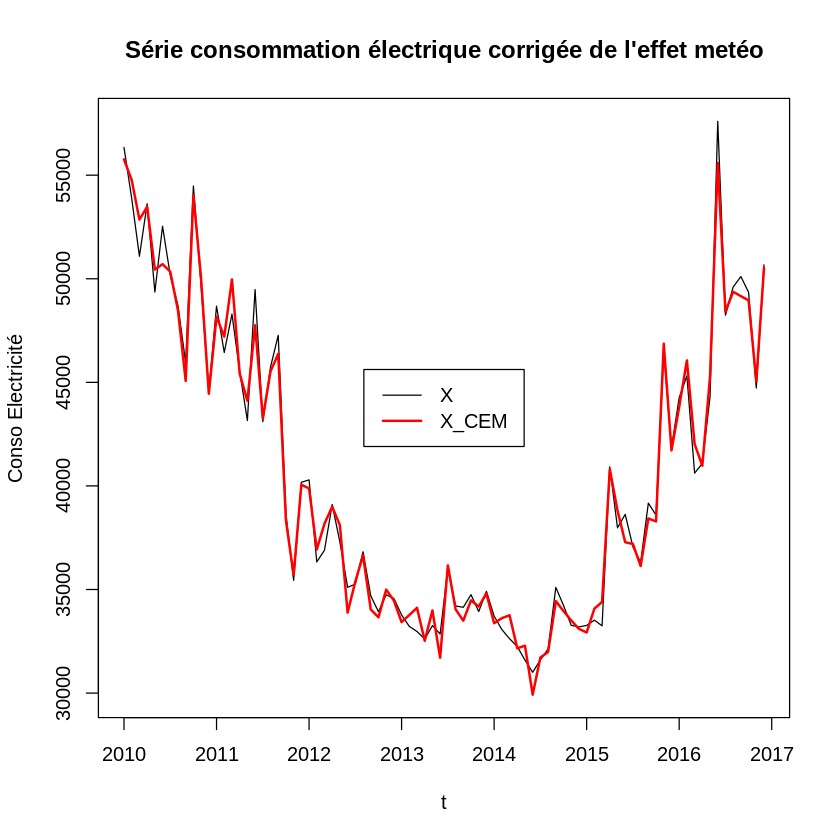

In [26]:
log_df_energie_ts_cem=log_df_energie_ts-(c[1]*s1+c[2]*s2+c[3]*s3+c[4]*s4+c[5]*s5+c[6]*s6+c[7]*s7+c[8]*s8+c[9]*s9+c[10]*s10+c[11]*s11+c[12]*s12)

df_energie_ts_cem=exp(log_df_energie_ts_cem)

ts.plot(df_energie_ts,df_energie_ts_cem,xlab='t',ylab='Conso Electricité',col=c(1,2),lwd=c(1,2),main = "Série consommation électrique corrigée de l'effet metéo")
legend('center',legend=c("X","X_CEM"),col=c(1,2),lwd=c(1,2))

In [27]:
png(filename='../presentation/images/ts_energie_cem.png')
ts.plot(df_energie_ts,df_energie_ts_cem,xlab='t',ylab='Conso Electricité',col=c(1,2),lwd=c(1,2),main = "Série consommation électrique corrigée de l'effet metéo")
legend('center',legend=c("X","X_CEM"),col=c(1,2),lwd=c(1,2))
dev.off()

png 
  2

<a id='mission2'></a>

# Mission 2 : Effectuez une désaisonnalisation de la consommation que vous aurez obtenue après correction, grâce aux moyennes mobiles.

## Désaisonnaliser une série temporelle à l'aide des moyennes mobile (alogrithme x11)
Il y a deux phases de 4 étapes. Chaque phase donne une St corrigée.


### Etape 1 : Primo-estimation de la tendance


In [28]:

m2_12=function(x){
  y=(1/12)*stats::filter(x,c(0.5,rep(1,times=11),0.5))
  return(y)
}
t1=m2_12(log_df_energie_ts_cem)

### Etape 2 : Primo-estimation de la somme composante saisonnière-perturbation


In [29]:
sig1=log_df_energie_ts_cem-t1



###  Etape 3 : Primo-estimation de la composante saisonnière


In [30]:
m3=function(x){
  
  y=(1/3)*stats::filter(x,rep(1,times=3))
  
  return(y)
  
}
s1=m3(m3(sig1))
shat1=s1-m2_12(s1)


### Etape 4 :  Primo-estimation de la série corrigée des variations saisonnières


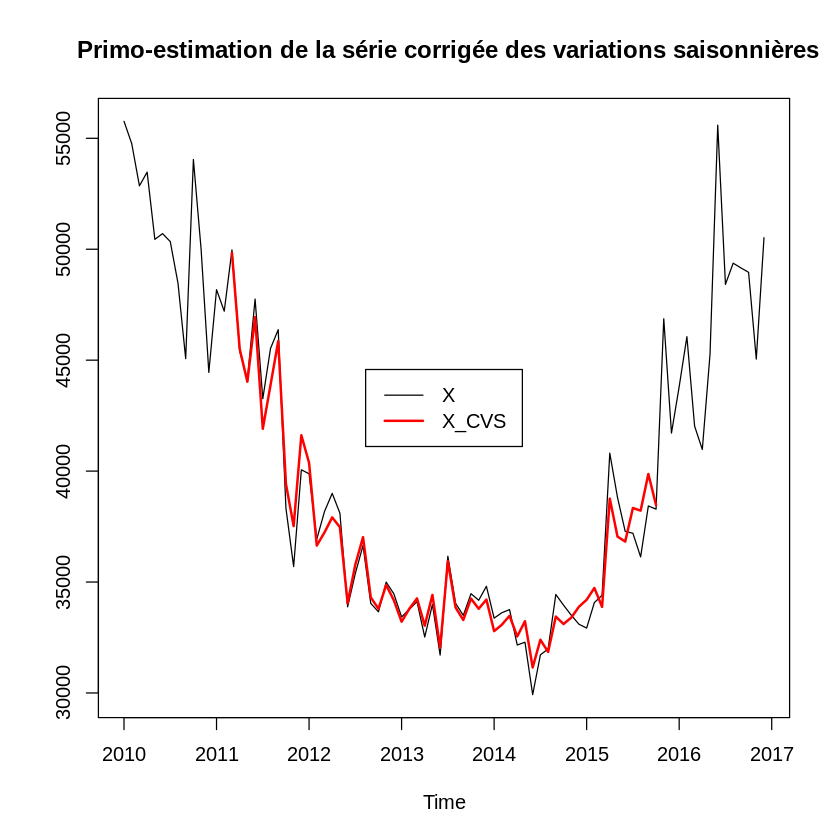

In [31]:
log_df_energie_ts_cem_cvs1=log_df_energie_ts_cem-shat1
df_energie_ts_cem_cvs1=exp(log_df_energie_ts_cem_cvs1)

ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs1,col=c(1,2),lwd=c(1,2),main=" Primo-estimation de la série corrigée des variations saisonnières")

legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))


In [32]:
png(filename='../presentation/images/phase1_desaison.png')
ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs1,col=c(1,2),lwd=c(1,2),main=" Primo-estimation de la série corrigée des variations saisonnières")
legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))
dev.off()

png 
  2

## Fin de la phase 1 et debut de la phase 2


### Etape 1 : Estimation définitive de la tendance


In [33]:
m13h=function(x){
  
  y=(1/16796)*stats::filter(x,c(-325,-468,0,1100,2475,3600,4032,3600,2475,1100,0,-468,-325))
  
  return(y)
  
}
t2=m13h(df_energie_ts_cem_cvs1)



### Etape 2 : Estimation définitive de la somme composante saisonnière-perturbation (2)


In [34]:
sig2=log_df_energie_ts_cem-t2



### Etape 3 : Estimation définitive de la composante saisonnière


In [35]:
m5=function(x){
  y=(1/5)*stats::filter(x,rep(1,times=5))
  return(y)
}
s2=m3(m5(sig2))
shat2=s2-m2_12(s2)



## Estimation définitive de la série corrigée des variations saisonnières


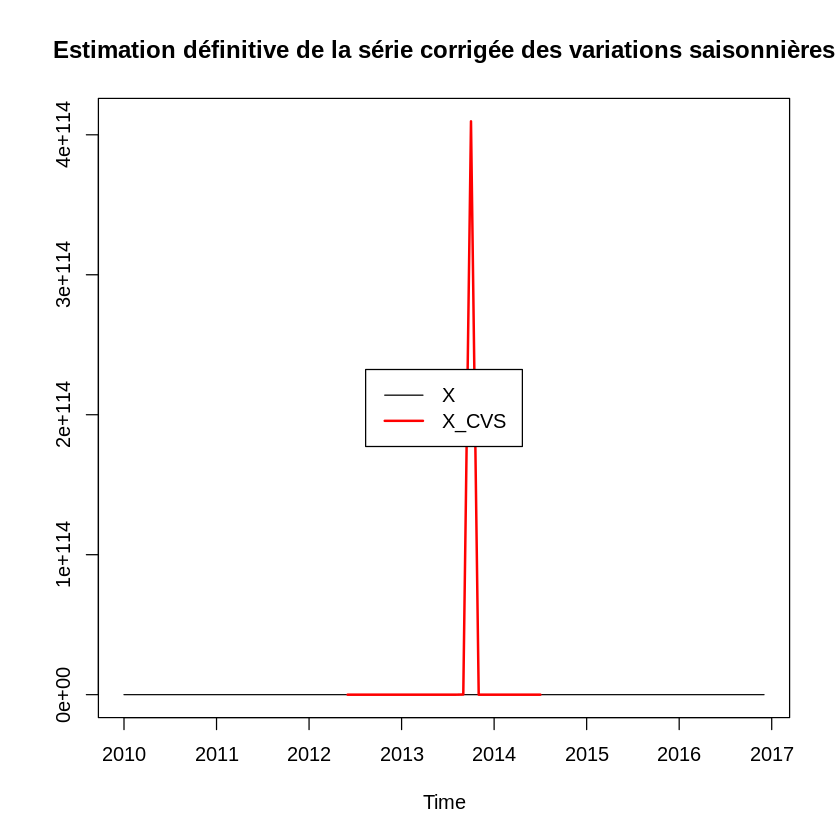

In [36]:
log_df_energie_ts_cem_cvs2=log_df_energie_ts_cem-shat2
df_energie_ts_cem_cvs2=exp(log_df_energie_ts_cem_cvs2)

ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs2,col=c(1,2),lwd=c(1,2),main="Estimation définitive de la série corrigée des variations saisonnières")

legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))

In [37]:
png(filename='../presentation/images/phase2_desaison.png')
ts.plot(df_energie_ts_cem,df_energie_ts_cem_cvs2,col=c(1,2),lwd=c(1,2),main="Estimation définitive de la série corrigée des variations saisonnières")
legend("center",legend=c("X","X_CVS"),col=c(1,2),lwd=c(1,2))
dev.off()

png 
  2

<a id='mission3'></a>

# Mission 3 : Effectuez une prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel) puis la méthode ARMA sur la série temporelle désaisonnalisée.

## Prévision de la consommation (corrigée de l'effet température) sur un an, en utilisant la méthode de Holt Winters (lissage exponentiel) 

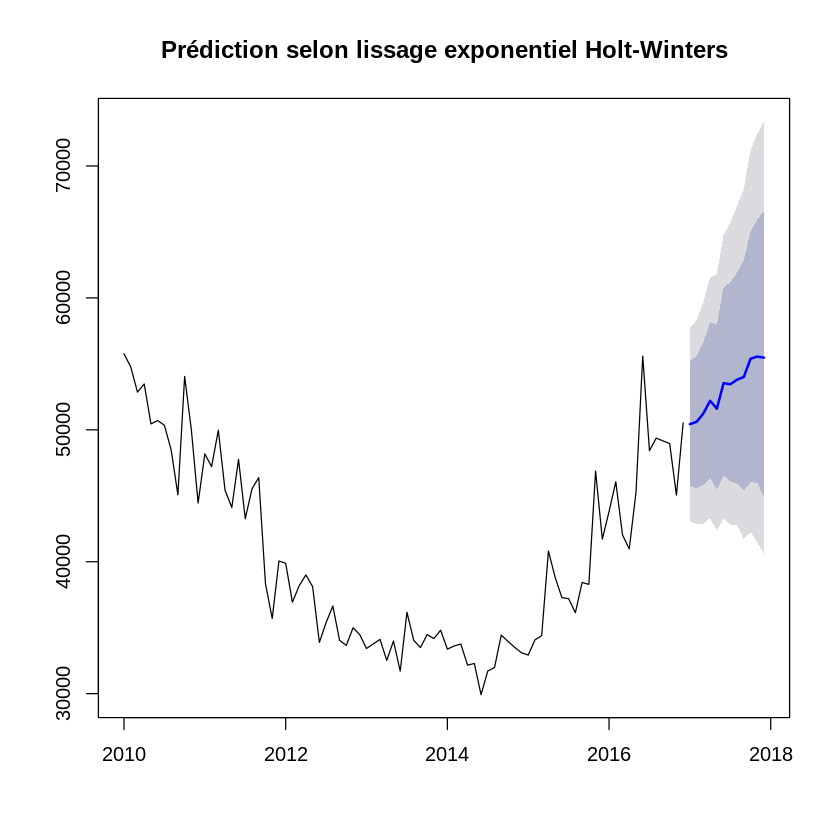

In [38]:
# Lissage holt-winters :
hw=ets(df_energie_ts_cem,model="MMM")
hw.pred=predict(hw,12)
plot(hw.pred,main='Prédiction selon lissage exponentiel Holt-Winters')

In [39]:
png(filename='../presentation/images/lissage_expo.png')
plot(hw.pred,main='Prédiction selon lissage exponentiel Holt-Winters')
dev.off()

png 
  2

## Prédiction avec la méthode ARMA sur la série temporelle désaisonnalisée.

Seuil = 5% <br/>
On désigne par Xt  la série conso électricité corrigée de l'effet météo, et on considère Yt=ln(Xt) <br/>
On a besoin de travailler sur le logarithme de la série afin de pallier l’accroissement de la saisonnalité. <br/>
On passe ainsi d’un modèle multiplicatif à un modèle additif.

## Processus stationnaire ou non ? 

En statistiques, on aime bien avoir des valeurs indépendantes -- or les séries temporelles ont des valeurs naturellement corrélées. Pour observer les corrélation on utilise une courbe d'autocorrélation (ACF)
Il y a trois observations possibles : 
    - l'ACF qui est presque nulle correspond à des données non corrélées (processus stationnaire) 
    - l'ACF tantôt positive, tantôt négative à des données pérriodiques 
    - Décroissance lente de la courbe ACF (processus non stationnaire)
    

Pour les modèles AR, MA, et ARMA le corrélogramme simple (représenté par la courbe ACF) décroit rapidement vers 0. A l'inverse si ça décroit lentement vers 0 ça ne peut pas correspondre à un processus stationnaire. (ARIMA, SARIMA)

Si la sortie ACF présente une décroissance rapide vers 0 (Les autocorrélations simples décroissent rapidement vers 0 (de manière exponentielle ou sinusoïdale amortie) le processus est donc stationnaire. 
---> Exit (ARIMA, SARIMA) <br/>
Rappel :  Un processus est dit stationnaire si la structure du processus sous-jacent supposé évolue ou non avec le temps. Si la structure reste la même, le processus est dit alors stationnaire. 

Pour info : Si la courbe ACF décroit lentement vers 0, on appliquera obligatoirement un opérateur de différentiation d'ordre 1 (I-B soit Xt-Xt-1) plusieurs fois jusqu'à avoir des pic d'autocorréllation identifiables. Il faut identifier l'ordre de ces pics, par exemple des pics d'ordre 12, et appliquer un opérateur de différentiation d'ordre 12 pour enfin obtenir un processus stationnaire. (CF Exemple ARIMA et SARIMA OpenClassrooms)

Pour les processus AR(p), les autocorrélations convergent vers 0 à vitesse géométrique alors que les autocorrélations partielles sont nulles à partir du rang p+1. Pour un jeu de données, les autocorrélations partielles empirique permettent donc d’avoir une idée des valeurs possibles pour p.

Pour les processus MA(q), les autocorrélations partielles convergent vers 0 à vitesse géométrique alors que les autocorrélations sont nulles à partir du rang q + 1. Les autocorrélations empiriques permettent d’avoir une idée des valeurs possibles pour q.

In [40]:
x = df_energie_ts_cem
y = log(x)

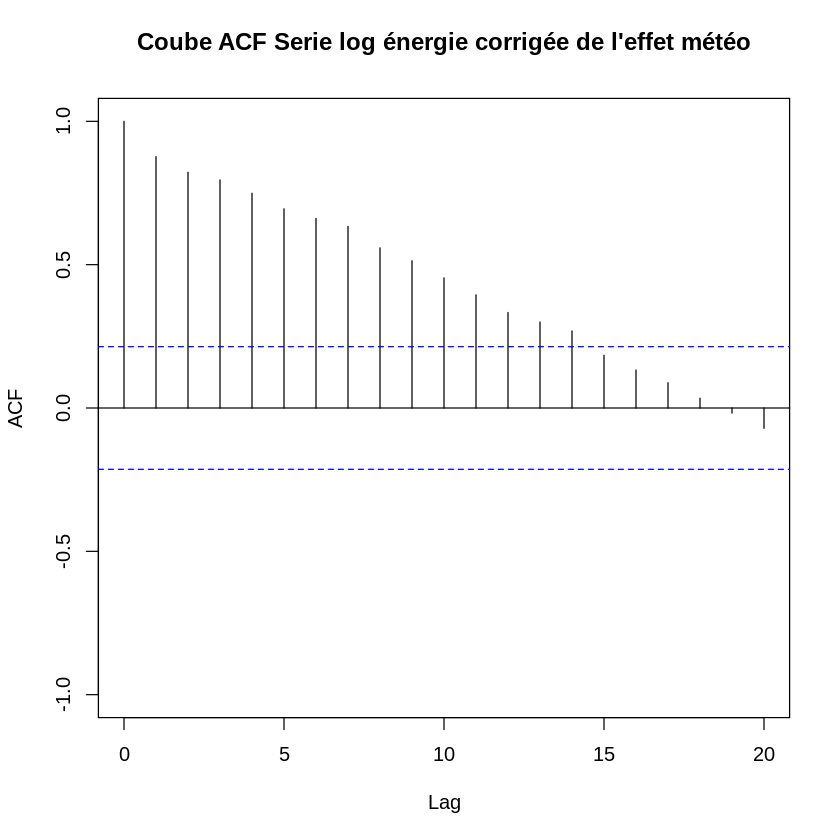

In [41]:
acf = acf(y,lag.max=20,plot=FALSE)
acf$lag = acf$lag*12

plot(acf,ylim=c(-1,1),main="Coube ACF Serie log énergie corrigée de l'effet météo")



In [42]:
png(filename='../presentation/images/courbe_acf_1.png')
plot(acf,ylim=c(-1,1),main="Coube ACF Serie log énergie corrigée de l'effet météo (y)")
dev.off()

png 
  2

La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité.
### On effectue donc une différenciation (I−B) .


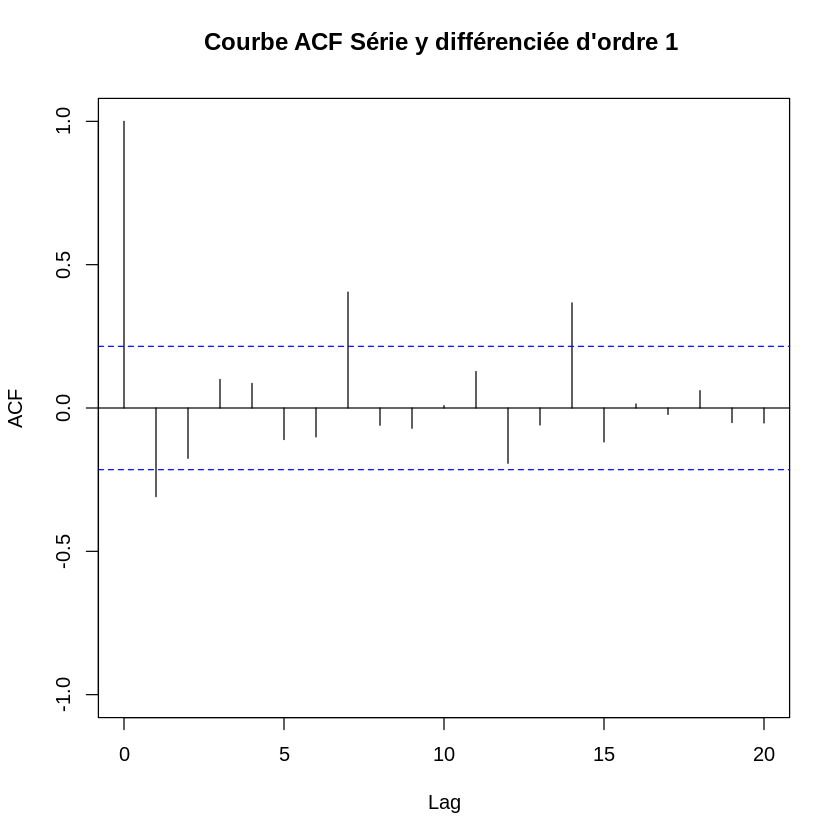

In [43]:
y_dif1=diff(y,lag=1,differences = 1)

acf = acf(y_dif1,lag.max=20,plot=FALSE)
acf$lag = acf$lag*12

plot(acf,ylim=c(-1,1),main="Courbe ACF Série y différenciée d'ordre 1 ")



In [44]:
png(filename='../presentation/images/courbe_acf_2.png')
plot(acf,ylim=c(-1,1),main="Courbe ACF Série y différenciée d'ordre 1 ")
dev.off()

png 
  2

La sortie ACF de la série ainsi différenciée présente encore une décroissance lente vers 0 pour les multiples de 7.
### On effectue cette fois la différenciation (I−B^7) .



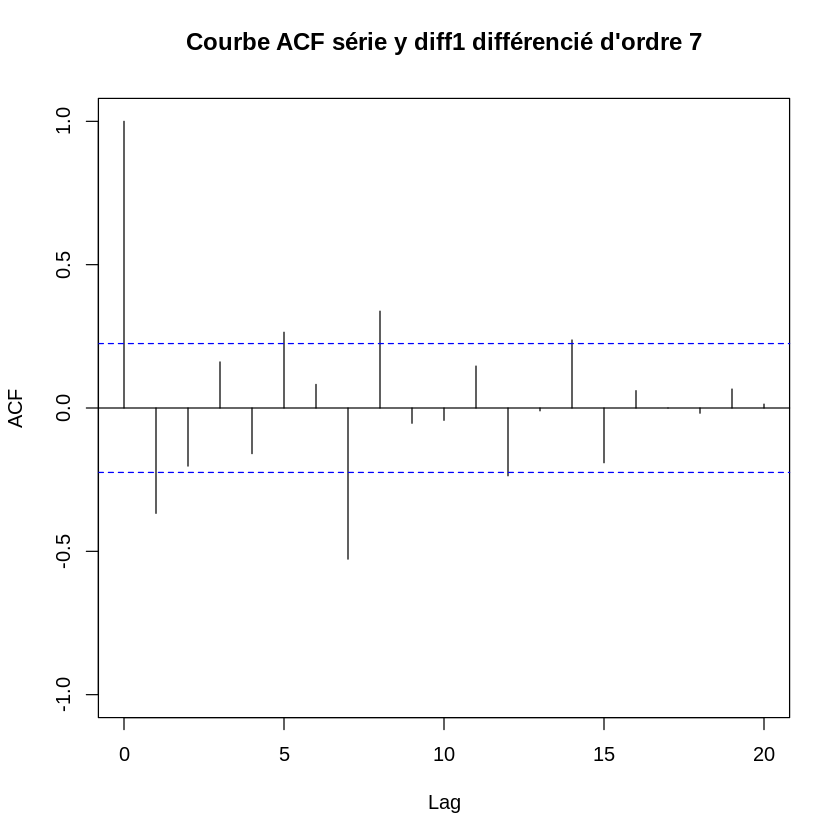

In [45]:
y_dif_1_7=diff(y_dif1,lag=7,differences=1)

acf = acf(y_dif_1_7,lag.max=20,plot=FALSE)
acf$lag = acf$lag*12

plot(acf,ylim=c(-1,1),main="Courbe ACF série y diff1 différencié d'ordre 7")




In [46]:
png(filename='../presentation/images/courbe_acf_3.png')
plot(acf,ylim=c(-1,1),main="Courbe ACF série y diff1 différencié d'ordre 7")
dev.off()

png 
  2

La sortie ACF de la série doublement différenciée semble pouvoir être interprétée comme un autocorrélogramme simple empirique.
On identifiera donc un modèle ARMA sur la série  (I−B)(I−B7)ln(Xt) .


### Identification, estimation et validation de modèles
On s'appuie sur les corrélogrammes simples et partiels estimés

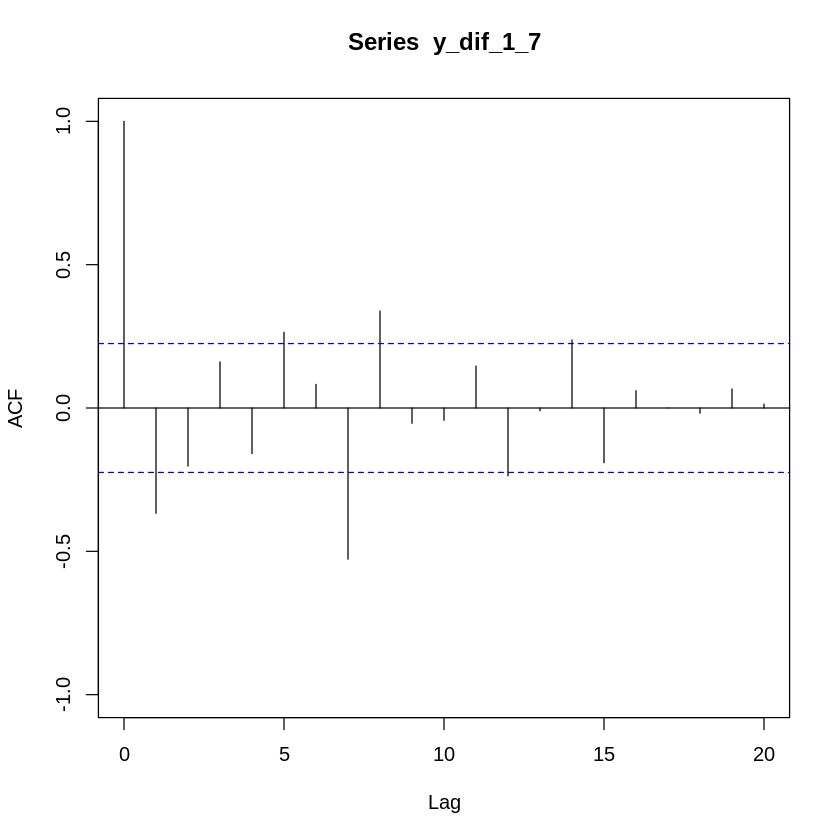

In [47]:


#simple
y_dif_1_7=diff(y_dif1,lag=7,differences=1)

acf = acf(y_dif_1_7,lag.max=20,plot=FALSE)
acf$lag = acf$lag*12

plot(acf,ylim=c(-1,1))



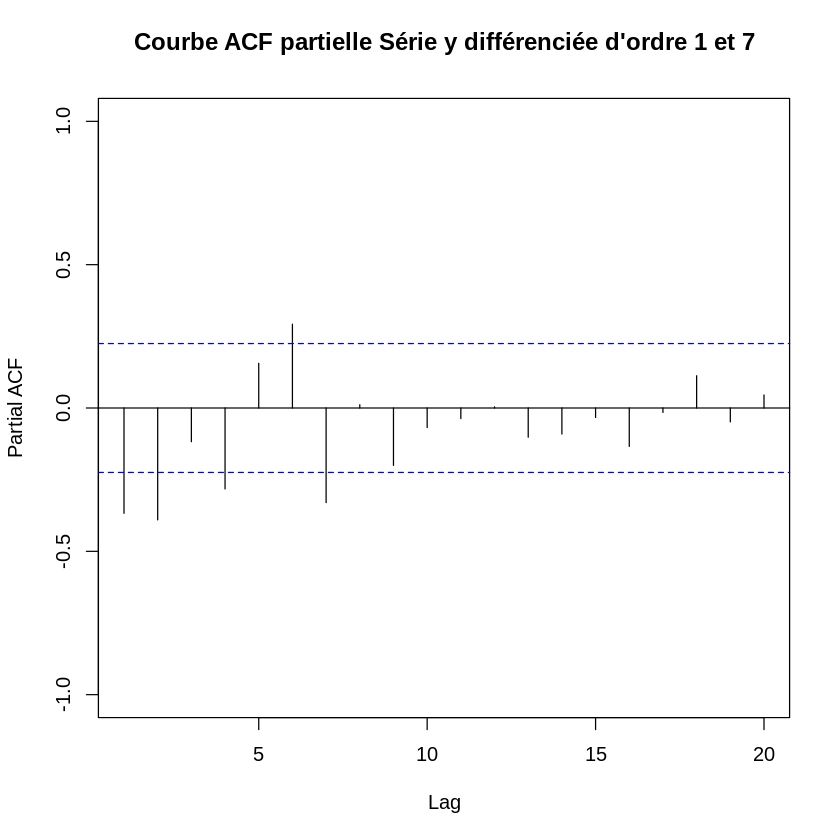

In [48]:
#partiel
y_dif_1_7=diff(y_dif1,lag=7,differences=1)

pacf = pacf(y_dif_1_7,lag.max=20,plot=FALSE)
pacf$lag = pacf$lag*12

plot(pacf,ylim=c(-1,1),main="Courbe ACF partielle Série y différenciée d'ordre 1 et 7")



In [49]:
png(filename='../presentation/images/courbe_pacf.png')
plot(pacf,ylim=c(-1,1),main="Courbe ACF partielle Série y différenciée d'ordre 1 et 7")
dev.off()

png 
  2

### Modèle 1 On estime en premier lieu un modèle SARIMA(1,1,1)(1,1,1)7 au vu des autocorrélogrammes empiriques simples et partiels. 


In [50]:

model1=Arima(y,order=c(1,1,1),seasonal = list(order=c(1,1,1),period=7),include.mean = FALSE,method = "CSS-ML")
summary(model1)

t_stat(model1)
#Ce modèle ayant des paramètres non significatifs, on en teste un second.

Box.test.2(model1$residuals,nlag = c(5,10,15,20),type="Ljung-Box",decim=5)
# Les p-valeurs ne sont pas inférieures au niveau de test de 5% donc on ne rejette pas l'hypothèse nulle qui est : Le résidu suit un bruit blanc




Series: y 
ARIMA(1,1,1)(1,1,1)[7] 

Coefficients:
         ar1      ma1     sar1    sma1
      0.0989  -0.5870  -0.7047  0.2333
s.e.  0.1795   0.1338   0.2370  0.3339

sigma^2 estimated as 0.003244:  log likelihood=110.64
AIC=-211.29   AICc=-210.43   BIC=-199.63

Training set error measures:
                     ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.00840153 0.05272918 0.03832083 0.07864327 0.3619782 0.2794862
                    ACF1
Training set -0.01281039


,ar1,ma1,sar1,sma1
t.stat,0.550738,-4.388501,-2.973915,0.698735
p.val,0.581813,0.000011,0.002940,0.484717


Retard,p-value
5,0.56472
10,0.61219
15,0.47034
20,0.68206


### Modèle 2 : On retire l'ordre du parametre le moins significatif du modele 1


In [51]:

model2=Arima(y,order=c(0,1,1),seasonal = list(order=c(1,1,1),period=7),include.mean = FALSE,method = "CSS-ML")
summary(model2)

t_stat(model2)
#Ce modèle ayant des paramètres non significatifs, on en teste un troisième.

Box.test.2(model2$residuals,nlag = c(5,10,15,20),type="Ljung-Box",decim=5)
# Les p-valeurs ne sont pas inférieures au niveau de test de 5% donc on ne rejette pas l'hypothèse nulle qui est : Le résidu suit un bruit blanc



Series: y 
ARIMA(0,1,1)(1,1,1)[7] 

Coefficients:
          ma1     sar1    sma1
      -0.5284  -0.7029  0.2328
s.e.   0.0966   0.2432  0.3415

sigma^2 estimated as 0.003213:  log likelihood=110.49
AIC=-212.98   AICc=-212.42   BIC=-203.66

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.008203305 0.05284306 0.03823245 0.07674292 0.3611799 0.2788416
                   ACF1
Training set 0.02017024


,ma1,sar1,sma1
t.stat,-5.472472,-2.890699,0.681856
p.val,0.000000,0.003844,0.495330


Retard,p-value
5,0.52125
10,0.63756
15,0.49246
20,0.71822


### Modèle 3 : On retire à nouveau l'ordre du paramêtre le moins significatif du modèle 2


In [52]:

model3=Arima(y,order=c(0,1,1),seasonal = list(order=c(1,1,0),period=7),include.mean = FALSE,method = "CSS-ML")
summary(model3)

t_stat(model3)

Box.test.2(model3$residuals,nlag = c(5,10,15,20),type="Ljung-Box",decim=5)

#Les tests de significativité des paramètres et de blancheur du résidu sont validés au niveau 5%.



Series: y 
ARIMA(0,1,1)(1,1,0)[7] 

Coefficients:
          ma1     sar1
      -0.5227  -0.5331
s.e.   0.0957   0.0998

sigma^2 estimated as 0.003197:  log likelihood=110.32
AIC=-214.64   AICc=-214.31   BIC=-207.65

Training set error measures:
                     ME       RMSE       MAE        MPE      MAPE      MASE
Training set 0.00889992 0.05307359 0.0380294 0.08323569 0.3591356 0.2773607
                   ACF1
Training set 0.01729725


,ma1,sar1
t.stat,-5.461541,-5.344334
p.val,0.000000,0.000000


Retard,p-value
5,0.50995
10,0.67542
15,0.65759
20,0.86621


### Pour compléter : Test de normalité

In [53]:
shapiro.test(model3$residuals)

# Le test de normalité est également validé pour ce modèle.



	Shapiro-Wilk normality test

data:  model3$residuals
W = 0.96749, p-value = 0.03202


### Prédictions

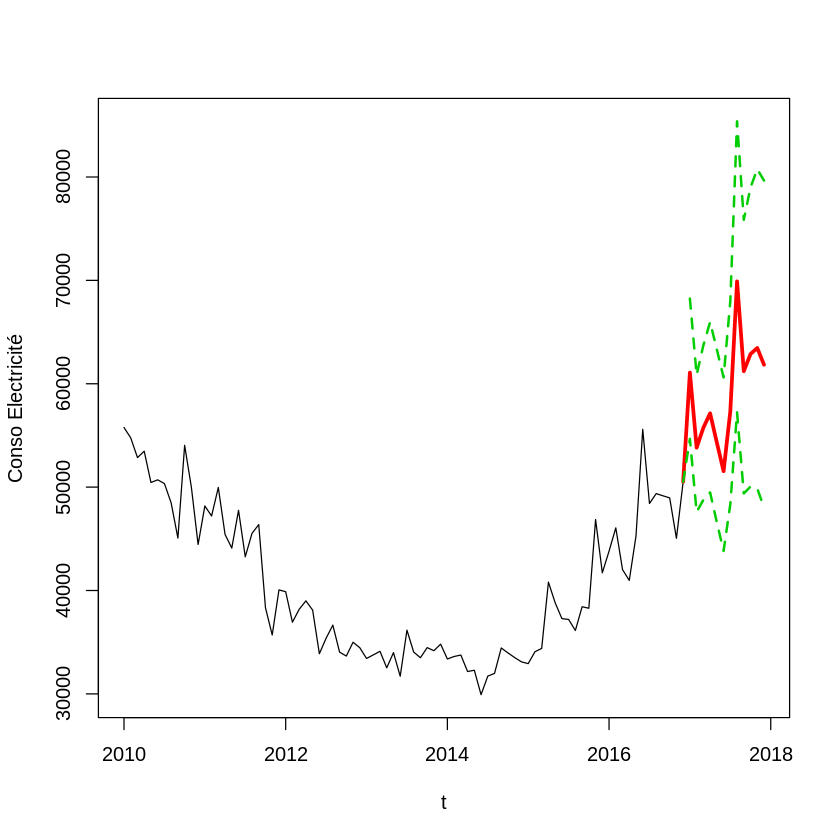

In [54]:
pred_model3=forecast(model3,h=12,level=95)
pred=ts(c(x[84],exp(pred_model3$mean)),start=c(2016,12),frequency=12)
pred_l=ts(c(x[84],exp(pred_model3$lower)),start=c(2016,12),frequency=12)
pred_u=ts(exp(c(x[84],pred_model3$upper)),start=c(2016,12),frequency=12)
ts.plot(x,pred,pred_l,pred_u,xlab="t",ylab="Conso Electricité",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(1,3,2,2),main="Prédiction de la consommation d'électricité selon le modèle ARMA")



In [60]:
png(filename='../presentation/images/pred_ARMA.png')
ts.plot(x,pred,pred_l,pred_u,xlab="t",ylab="Conso Electricité",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(1,3,2,2),main="Prédiction de la consommation d'électricité selon le modèle ARMA")
dev.off()

png 
  2

### Zoom


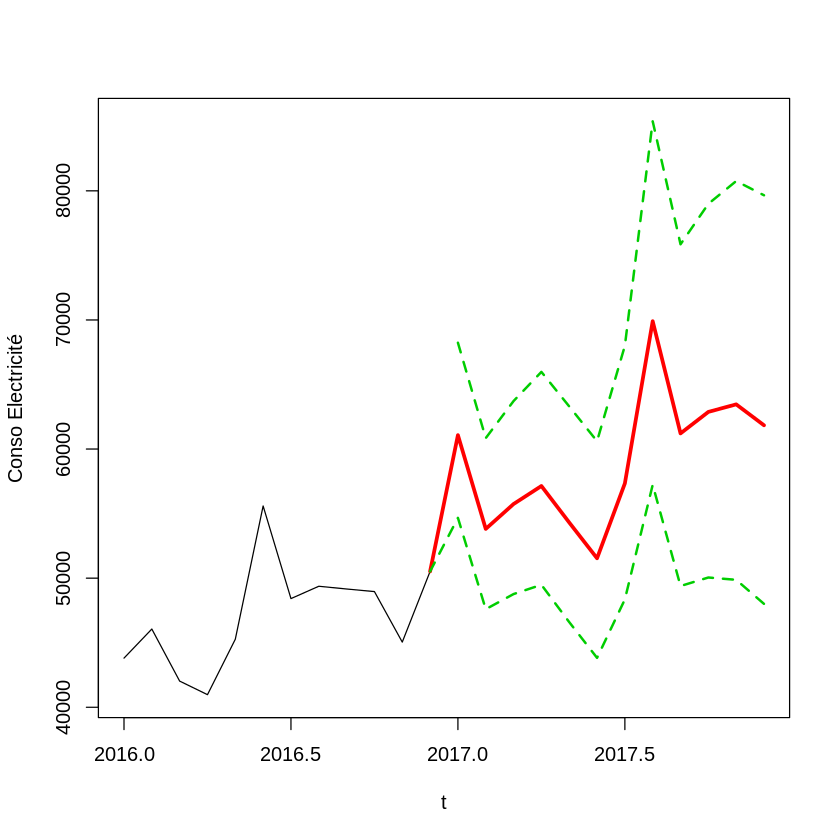

In [55]:
ts.plot(window(x,start=c(2016,1)),pred,pred_l,pred_u,xlab="t",ylab="Conso Electricité",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(1,3,2,2),main='Zoom prédictions conso électrique avec modèle ARMA')

In [61]:
png(filename='../presentation/images/pred_zoom_ARMA.png')
ts.plot(window(x,start=c(2016,1)),pred,pred_l,pred_u,xlab="t",ylab="Conso Electricité",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(1,3,2,2),main='Zoom prédictions conso électrique avec modèle ARMA')
dev.off()

png 
  2

### Analyse a posteriori
On tronque la série de l’année 2016, qu’on cherche ensuite à prévoir à partir de l’historique 2010-2015.


In [56]:

x_tronc=window(x,end=c(2015,12))
y_tronc=log(x_tronc)
x_a_prevoir=window(x,start=c(2016,1))



In [57]:
#On vérifie que le modèle 3 sur la série tronquée est toujours validé.
model3tronc=Arima(y_tronc,order=c(0,1,1),list(order=c(1,1,0),period=7),include.mean=FALSE,method="CSS-ML")
summary(model3tronc)

t_stat(model3tronc)
Box.test.2(model3tronc$residuals,nlag=c(5,10,15,20),type="Ljung-Box",decim=5)
shapiro.test(model3tronc$residuals)



Series: y_tronc 
ARIMA(0,1,1)(1,1,0)[7] 

Coefficients:
          ma1     sar1
      -0.4746  -0.5695
s.e.   0.1159   0.1040

sigma^2 estimated as 0.00323:  log likelihood=92.38
AIC=-178.77   AICc=-178.37   BIC=-172.29

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.009086299 0.05274054 0.03633991 0.08517142 0.3441972 0.3016474
                   ACF1
Training set 0.02465488


,ma1,sar1
t.stat,-4.093910,-5.475131
p.val,0.000042,0.000000


Retard,p-value
5,0.51888
10,0.52199
15,0.62174
20,0.84711



	Shapiro-Wilk normality test

data:  model3tronc$residuals
W = 0.94838, p-value = 0.005115


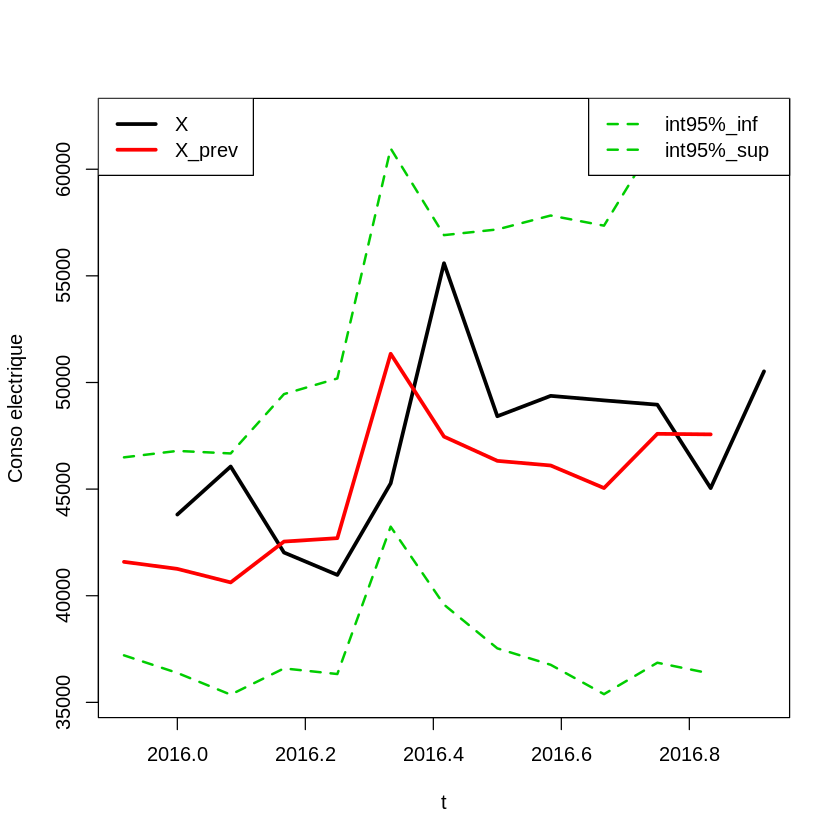

In [58]:

pred_model3tronc=forecast(model3tronc,h=12,level=95)
pred_tronc=ts(exp(pred_model3tronc$mean),start=c(2015,12),frequency=12)
pred_l_tronc=ts(exp(pred_model3tronc$lower),start=c(2015,12),frequency=12)
pred_u_tronc=ts(exp(pred_model3tronc$upper),start=c(2015,12),frequency=12)
ts.plot(x_a_prevoir,pred_tronc,pred_l_tronc,pred_u_tronc,xlab="t",ylab="Conso electrique",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(3,3,2,2),main='Vérif prédiction 2016')
legend("topleft",legend=c("X","X_prev"),col=c(1,2,3,3),lty=c(1,1),lwd=c(3,3))
legend("topright",legend=c("int95%_inf","int95%_sup"),col=c(3,3),lty=c(2,2),lwd=c(2,2))



In [62]:
png(filename='../presentation/images/verif_pred_ARMA.png')
ts.plot(x_a_prevoir,pred_tronc,pred_l_tronc,pred_u_tronc,xlab="t",ylab="Conso electrique",col=c(1,2,3,3),lty=c(1,1,2,2),lwd=c(3,3,2,2),main='Vérif prédiction 2016')
legend("topleft",legend=c("X","X_prev"),col=c(1,2,3,3),lty=c(1,1),lwd=c(3,3))
legend("topright",legend=c("int95%_inf","int95%_sup"),col=c(3,3),lty=c(2,2),lwd=c(2,2))
dev.off()

png 
  2

On constate que la réalisation 2016 est dans l’intervalle de prévision à 95% (basé sur les données antérieures à 2015).


### On calcule les RMSE et MAPE.


In [59]:
rmse=sqrt(mean((x_a_prevoir-pred_tronc)^2))
rmse

mape=mean(abs(1-pred_tronc/x_a_prevoir))*100
mape



[1] 4072.805

[1] 7.161873

L’interprétation des critères d’erreur dépend de la série et de la qualité de prévision exigée. Dans le cas présent, un MAPE de 7.2% semble satisfaisant a priori.